Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
df_airbnb = airbnb[c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
df_airbnb$Square.Meters<-df_airbnb$Square.Feet*0.092903
df_airbnb$Square.Feet<-NULL
head (df_airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Barcelona,Entire home/apt,El Gòtic,2,1,0,1,349,1,0,NA,41.38389,2.171802,NA
2,Barcelona,Entire home/apt,El Raval,6,1,2,3,165,4,20,93,41.38266,2.167558,NA
3,Barcelona,Entire home/apt,Dreta de l'Eixample,5,1,2,2,129,3,20,94,41.38847,2.168451,NA
4,Barcelona,Entire home/apt,La Sagrada Família,5,1,2,2,90,1,0,100,41.40259,2.176946,NA
5,Barcelona,Entire home/apt,La Sagrada Família,6,1,2,3,89,1,0,100,41.40501,2.173369,NA
6,Barcelona,Entire home/apt,Sants-Montjuïc,5,2,3,3,68,1,0,84,41.36726,2.147609,NA


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
df_madrid<-subset(df_airbnb,Room.Type=="Entire home/apt" & City=="Madrid" & Neighbourhood!="")

df_madrid$Neighbourhood<-droplevels(df_madrid$Neighbourhood, exclude = if(anyNA(levels(df_madrid$Neighbourhood))) NA)
#levels(df_madrid$Neighbourhood)

df_madrid<-df_madrid[c(3:14)]
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [4]:
TotalApartamentos<-nrow(df_madrid)
ApartamentoSinMC<-length(which(is.na(df_madrid$Square.Meters)))

print(paste("Tenemos un total de",TotalApartamentos,"apartamentos."))
print(paste("De ellos,", ApartamentoSinMC, "no tienen el valor de metros cuadrados."))
print(paste("Por tanto, el ",round(ApartamentoSinMC/TotalApartamentos*100,2),"% no tiene datos de metros cuadrados."))


[1] "Tenemos un total de 5601 apartamentos."
[1] "De ellos, 5254 no tienen el valor de metros cuadrados."
[1] "Por tanto, el  93.8 % no tiene datos de metros cuadrados."


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [5]:
ApartamentosConMC<-TotalApartamentos - ApartamentoSinMC
Apartamentos0MC<-length(which(df_madrid$Square.Meters==0))

print(paste("Tenemos",ApartamentosConMC,"apartamentos con un valor de metros cuadrados."))
print(paste("De ellos,", Apartamentos0MC, "tienen un valor de 0 metros cuadrados."))
print(paste("Por tanto, el ",round(Apartamentos0MC/ApartamentosConMC*100,2),"% tiene un valor de 0 metros cuadrados."))


[1] "Tenemos 347 apartamentos con un valor de metros cuadrados."
[1] "De ellos, 128 tienen un valor de 0 metros cuadrados."
[1] "Por tanto, el  36.89 % tiene un valor de 0 metros cuadrados."


Reemplazar todos los 0m^2 por NA 

In [6]:
df_madrid$Square.Meters[df_madrid$Square.Meters=='0'] <-NA
#con los siguientes comandos compruebo que he hecho bien la sustitución de 0 m2 por NA
#length(which(df_madrid$Square.Meters==0))
#length(which(is.na(df_madrid$Square.Meters)))
#ApartamentoSinMC+Apartamentos0MC

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

Loading required package: magrittr

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 5382 rows containing non-finite values (stat_density).”


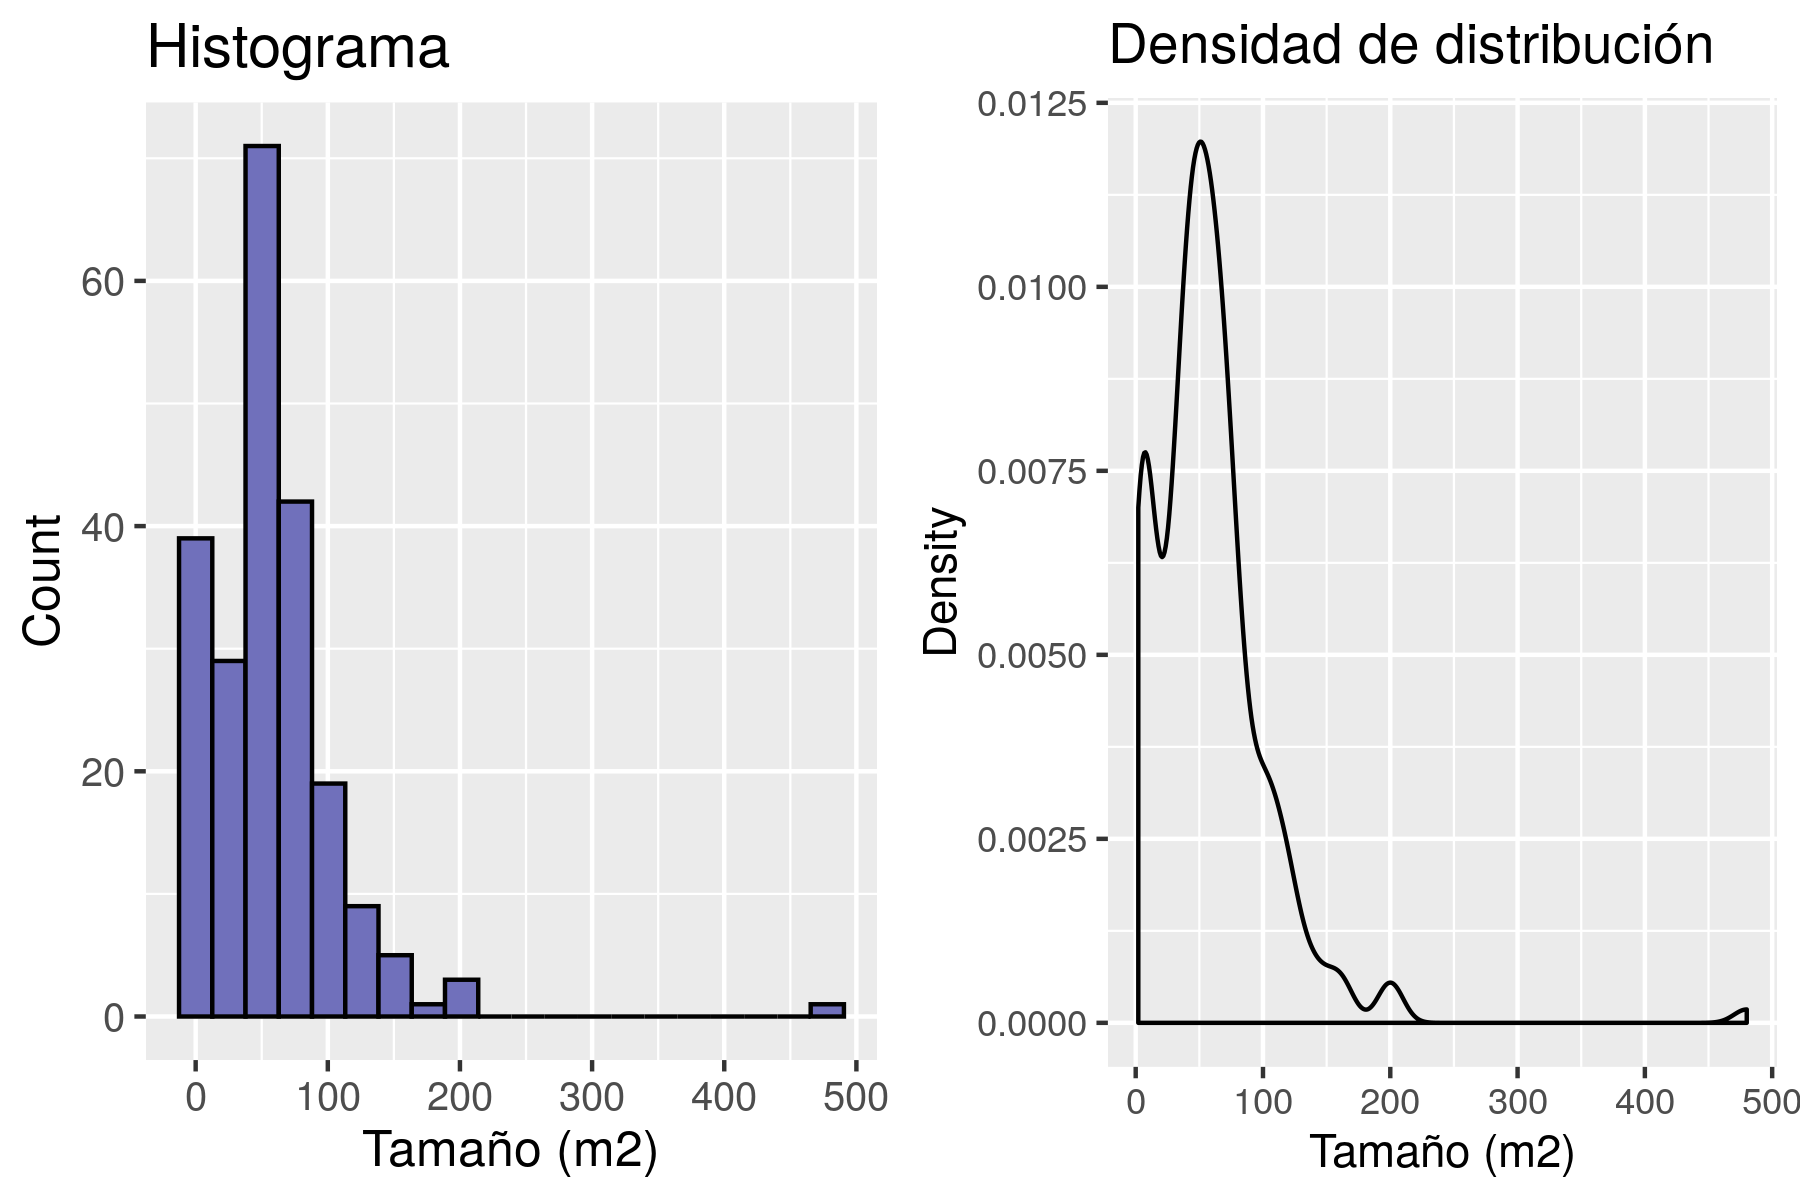

In [7]:
library(ggplot2)
library(ggpubr)
g1<-ggplot(data=df_madrid,aes(x=Square.Meters))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=12))+
    labs(x="Tamaño (m2)", y="Count", title= "Histograma")
g2<-ggplot(df_madrid,aes(x=Square.Meters))+geom_density(bw=10)+
    labs(x="Tamaño (m2)", y="Density", title="Densidad de distribución")
ggarrange(g1,g2,ncol=2)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [8]:
#las líneas comentadas son para comprobar que estoy haciendo bien la transformación a NA
#length(which(df_madrid$Square.Meters<='20'))
#length(which(is.na(df_madrid$Square.Meters)))

df_madrid$Square.Meters[df_madrid$Square.Meters<'20'] <-NA

#length(which(df_madrid$Square.Meters<='20'))
#length(which(is.na(df_madrid$Square.Meters)))

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


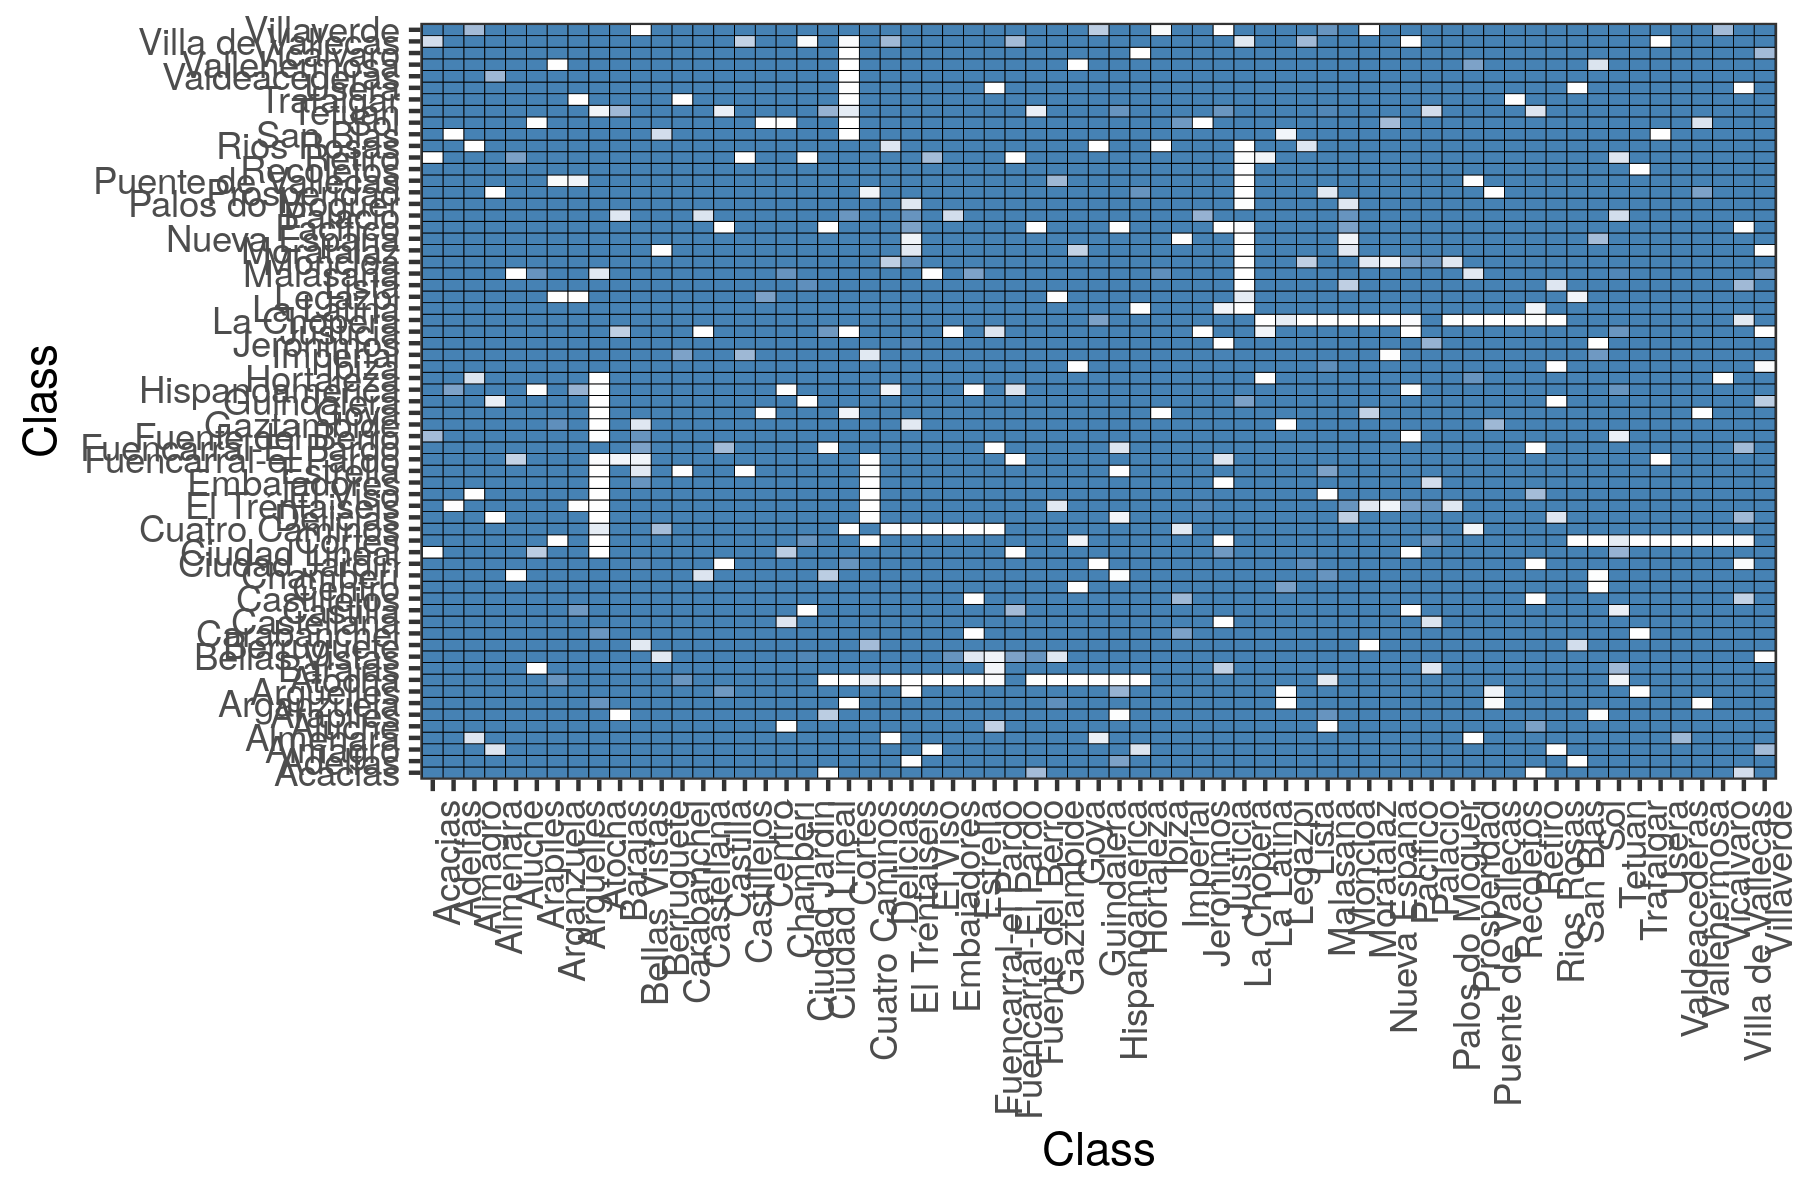

In [9]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


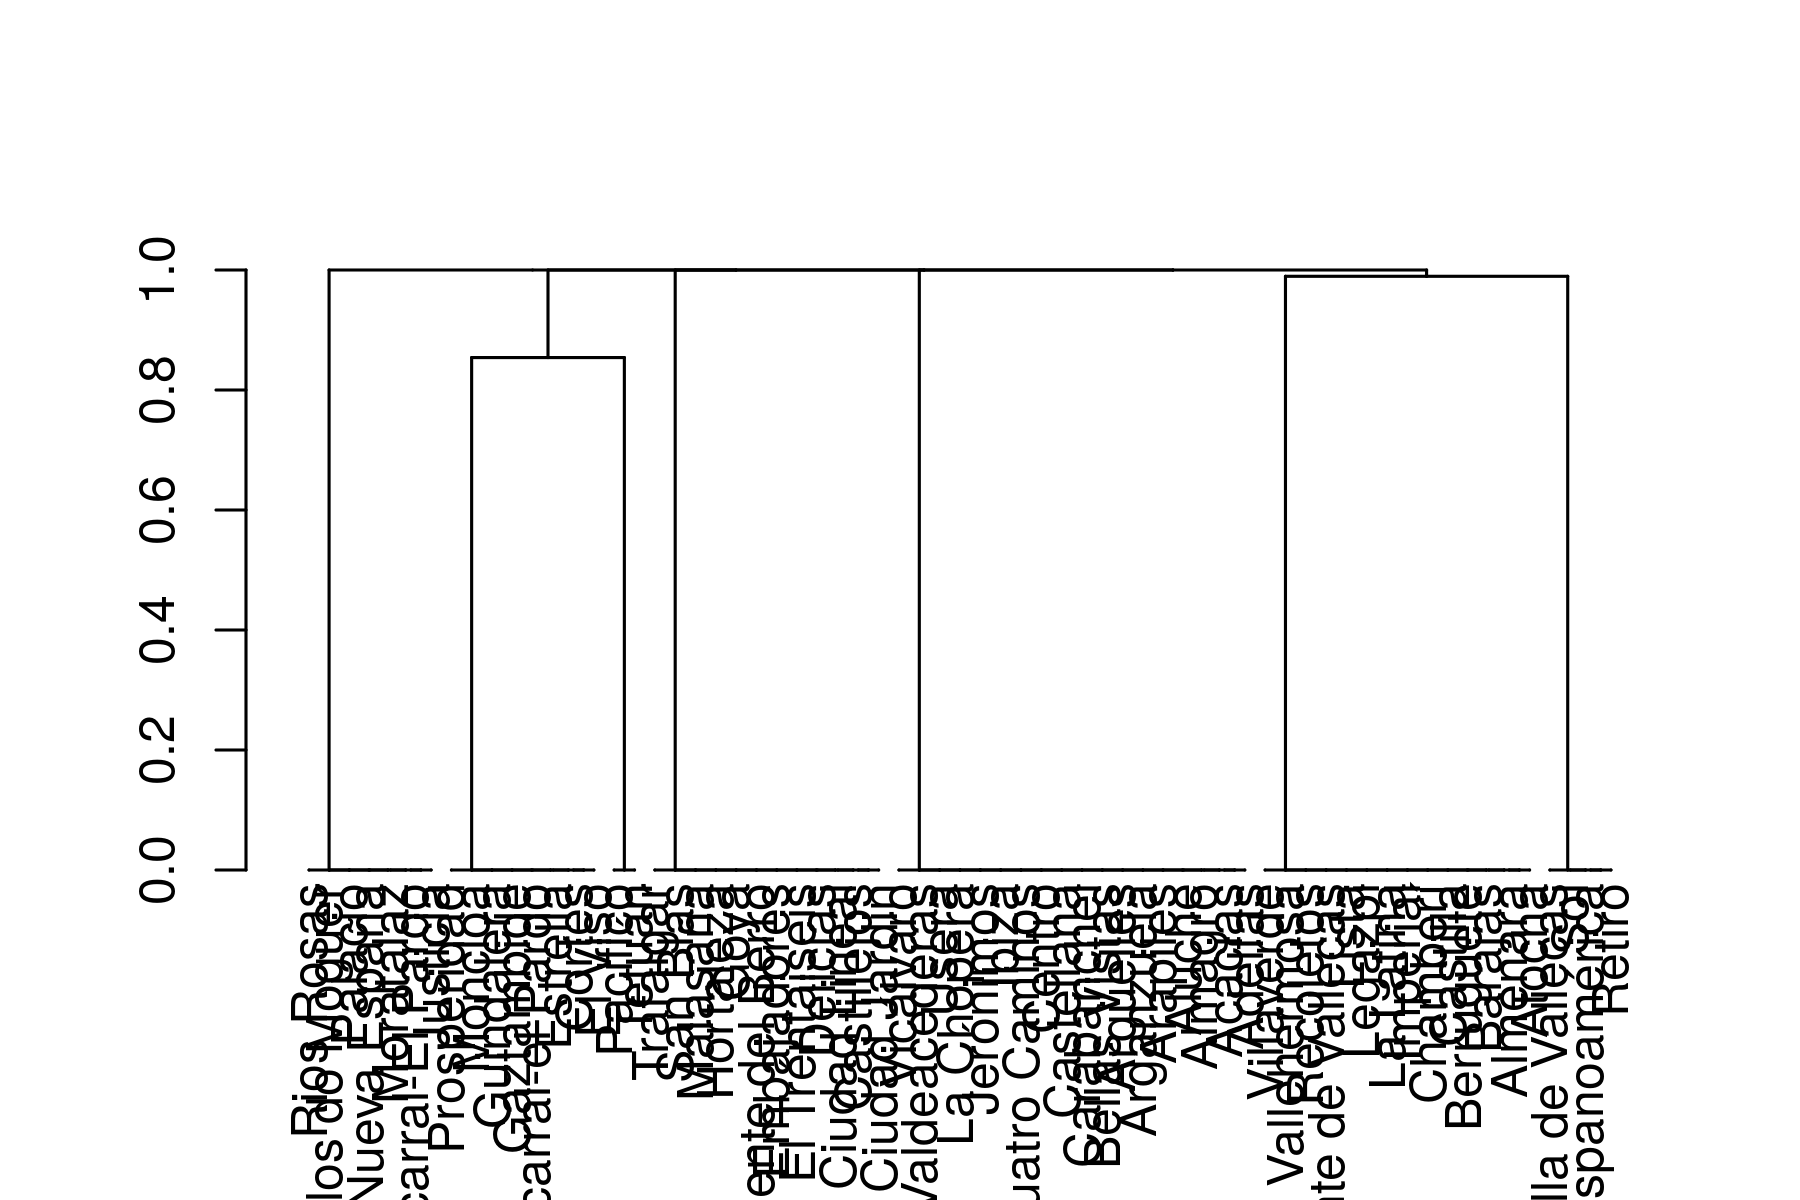

In [10]:
d = as.dist(1 - resm) 
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:ggpubr’:

    rotate


The following object is masked from ‘package:stats’:

    cutree




[1] "Con un punto de corte de 0.9 tenemos 6 clusters."


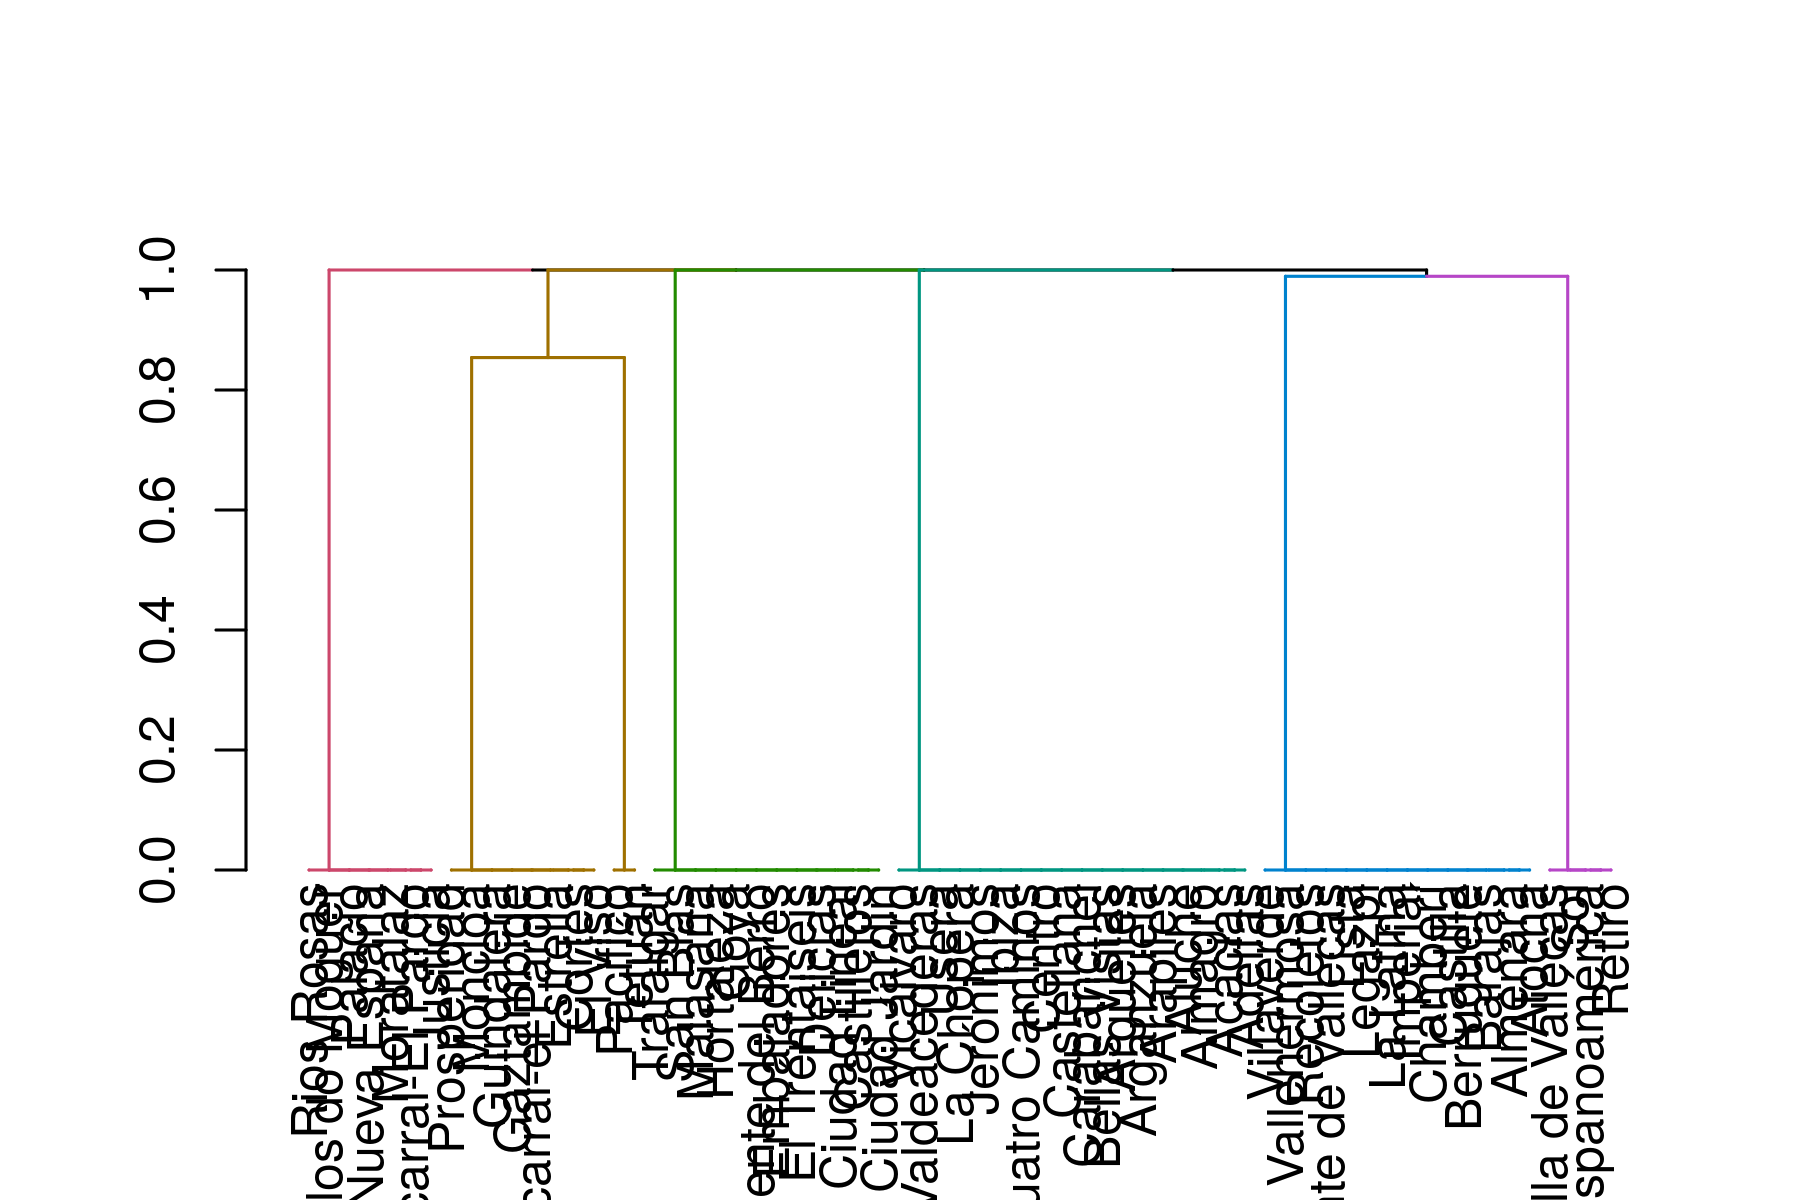

In [11]:
library(dendextend)

cls<-cutree_1h.dendrogram(hcd,h=0.9)
NumCluster<-max(levels(factor(cls)))

print(paste("Con un punto de corte de 0.9 tenemos",NumCluster,"clusters."))
plot(color_branches(hcd, h=0.9))

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [12]:
aux <- data.frame('Neighbourhood'=names(cls),'neighb_id'=cls)
aux$neighb_id<-as.factor(aux$neighb_id)
df_madrid <- merge(df_madrid, aux, by='Neighbourhood')

summary(df_madrid)


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [17]:
df_madrid$Neighbourhood<-NULL
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
df_madrid.train<-df_madrid[idx,]
df_madrid.test <-df_madrid[-idx,]

In [18]:
model_madrid<-lm(Square.Meters~Bedrooms+Price,data=df_madrid.train)
summary(model_madrid)
#No sé qué he podido hacer mal porque no saco un modelo con el que poder fiarme del R^2.
#La forma de calcular R^2 creo que está bien porque para train da el mismo resultado que el linear model.


Call:
lm(formula = Square.Meters ~ Bedrooms + Price, data = df_madrid.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.716  -13.113    4.972   18.506  255.736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.79685    6.86699  -0.990    0.324    
Bedrooms    23.52425    4.53917   5.182 8.45e-07 ***
Price        0.31087    0.07347   4.231 4.44e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.47 on 126 degrees of freedom
  (3791 observations deleted due to missingness)
Multiple R-squared:  0.4393,	Adjusted R-squared:  0.4304 
F-statistic: 49.36 on 2 and 126 DF,  p-value: < 2.2e-16


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [15]:
myrsquared<-function(Y,est_Y){
    Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
    return(Rsq)
}

[1] "R^2 del modelo sobre conjunto de training: 0.439325376543013"

[1] "R^2 del modelo sobre conjunto de testing: 0.15154881226672"

[1] 129

[1] 54

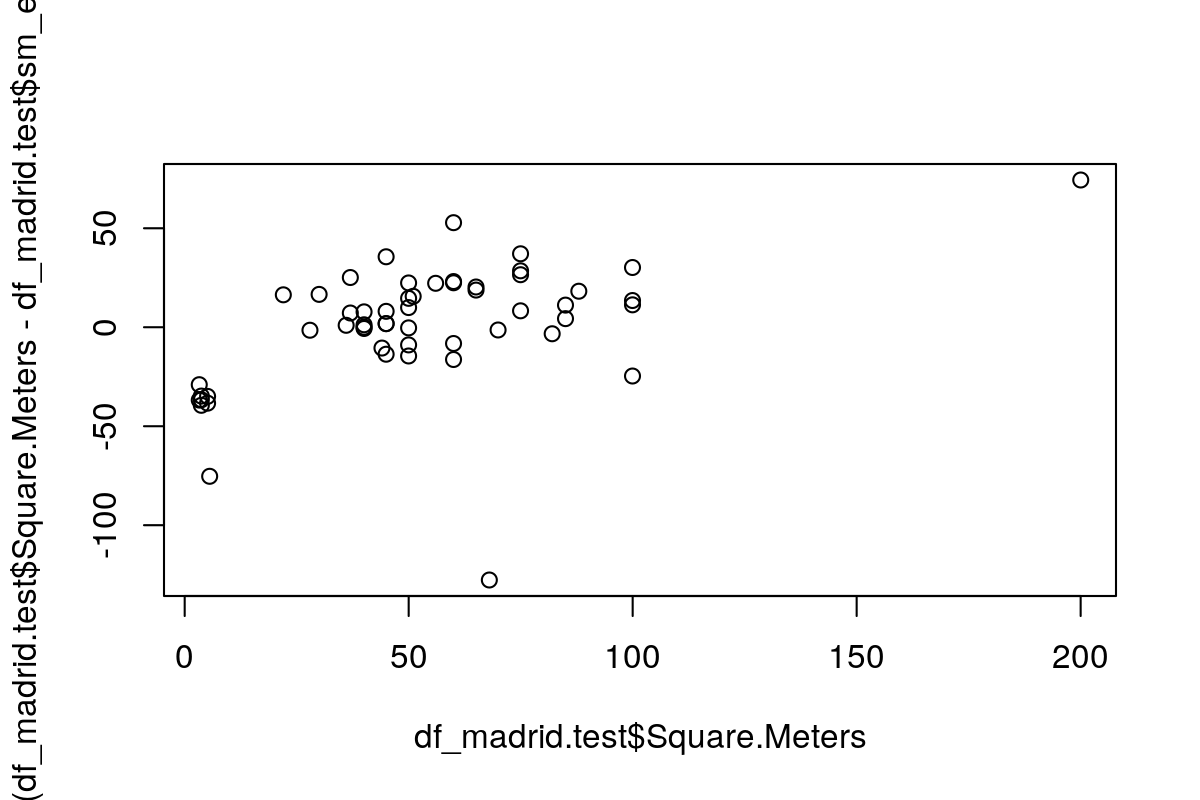

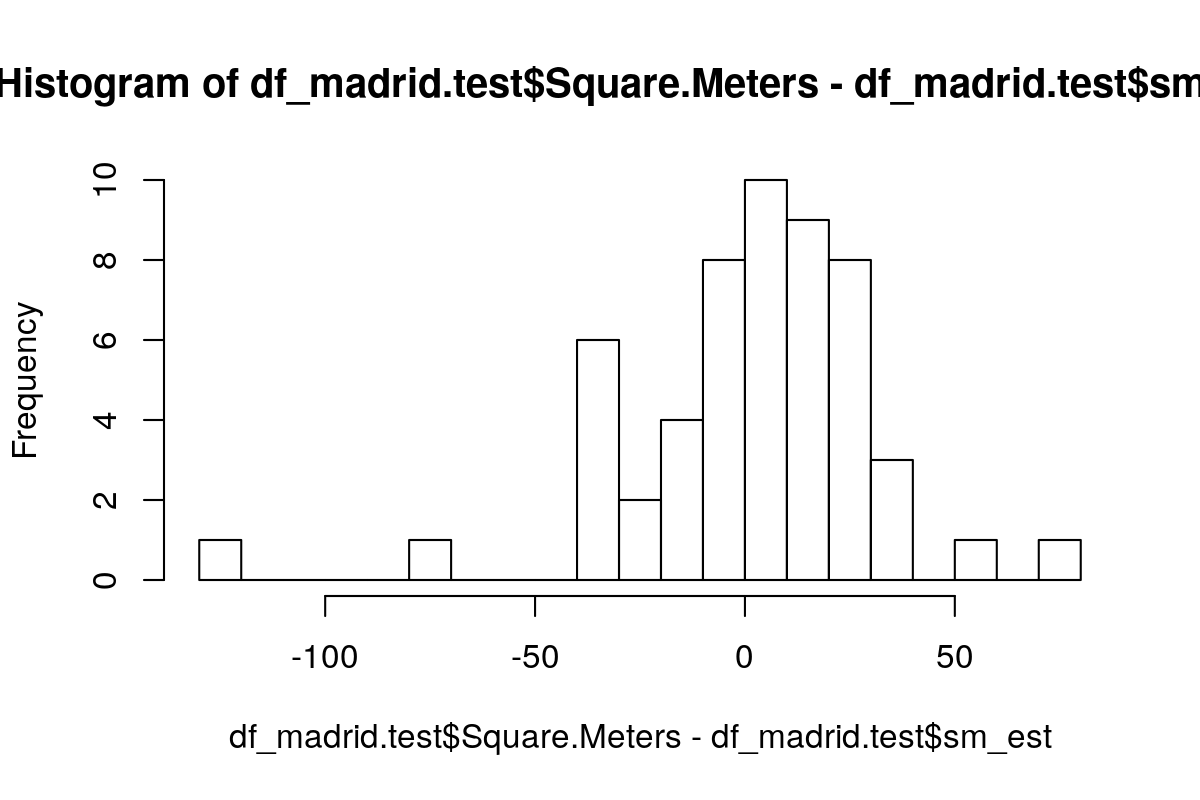

In [19]:
#aplicamos el modelo a los df train y test
df_madrid.train$sm_est<-predict(model_madrid,df_madrid.train)
df_madrid.test$sm_est<-predict(model_madrid,df_madrid.test)

#calculamos un subset de los df anteriores quitando los NA y así poder calcular el R^2
r2check.train<-NULL
r2check.test<-NULL
r2check.train<-subset(df_madrid.train, !is.na(Square.Meters) & !is.na(sm_est))
r2check.test<-subset(df_madrid.test, !is.na(Square.Meters) & !is.na(sm_est))

paste("R^2 del modelo sobre conjunto de training:",myrsquared(r2check.train$Square.Meters,r2check.train$sm_est))
paste("R^2 del modelo sobre conjunto de testing:",myrsquared(r2check.test$Square.Meters,r2check.test$sm_est))
length(r2check.train$sm_est)
length(r2check.test$sm_est)

options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)
plot(df_madrid.test$Square.Meters,(df_madrid.test$Square.Meters-df_madrid.test$sm_est))
hist(df_madrid.test$Square.Meters-df_madrid.test$sm_est,15)


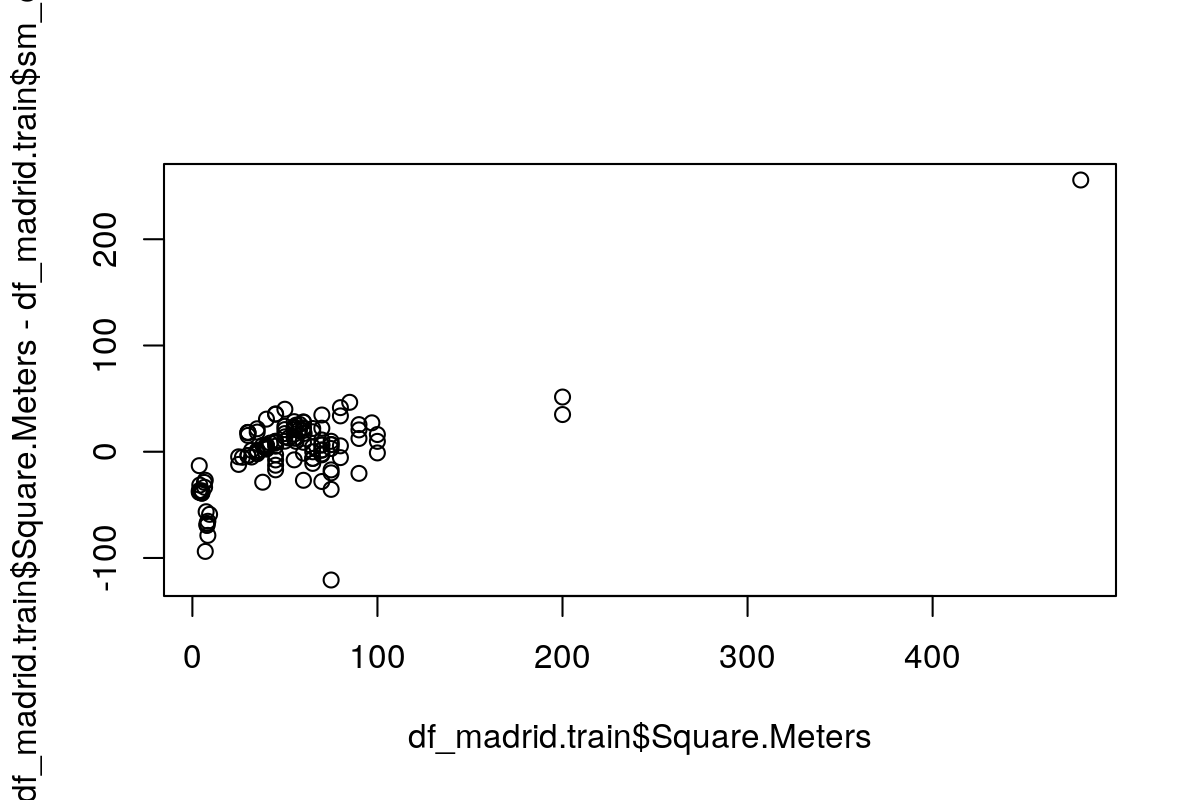

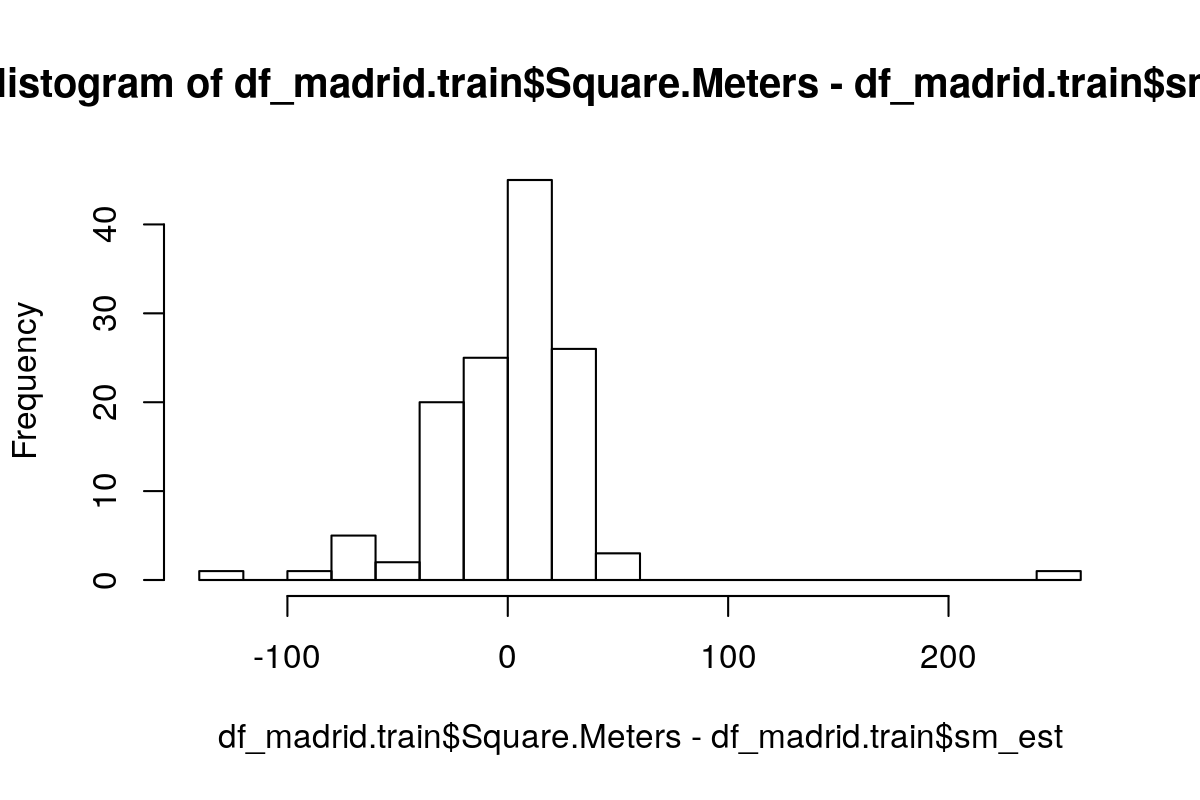

In [20]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

plot(df_madrid.train$Square.Meters,(df_madrid.train$Square.Meters-df_madrid.train$sm_est))
hist(df_madrid.train$Square.Meters-df_madrid.train$sm_est,20)


Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [21]:
print(paste("El barrio de Sol pertenece al clúster", aux$neighb_id[aux$Neighbourhood=="Sol"]))


[1] "El barrio de Sol pertenece al clúster 1"


In [22]:
newRoom<-data.frame('Accommodates'=6,'Price'=80,'Bedrooms'=3,'neighb_id'='1')
newRoom$est.sm<-predict(model_madrid,newRoom)

print(paste("Para un apartamento de esas características estimamos", round(predict(model_madrid,newRoom),2),"metros cuadrados"))
print(paste("Con cada habitación adicional aumentaríamos", round(model_madrid$coefficients['Bedrooms'],2),"metros cuadrados"))


[1] "Para un apartamento de esas características estimamos 88.65 metros cuadrados"
[1] "Con cada habitación adicional aumentaríamos 23.52 metros cuadrados"


Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [23]:
#creamos una función para establecer un mínimo en la predicción de 20 m2.
myPredict<-function(model,df){ifelse(predict(model,df)<20,20,predict(model,df))}

df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)]<-myPredict(model_madrid,df_madrid[is.na(df_madrid$Square.Meters),])

summary(df_madrid)

  Accommodates      Bathrooms        Bedrooms           Beds       
 Min.   : 1.000   Min.   :0.000   Min.   : 0.000   Min.   : 1.000  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median :1.000   Median : 1.000   Median : 2.000  
 Mean   : 4.101   Mean   :1.248   Mean   : 1.453   Mean   : 2.393  
 3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000  
 Max.   :16.000   Max.   :6.500   Max.   :10.000   Max.   :16.000  
                  NA's   :14      NA's   :7        NA's   :8       
     Price        Guests.Included   Extra.People    Review.Scores.Rating
 Min.   : 10.00   Min.   : 1.000   Min.   :  0.00   Min.   : 20.00      
 1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00   1st Qu.: 88.00      
 Median : 75.00   Median : 2.000   Median : 10.00   Median : 93.00      
 Mean   : 88.74   Mean   : 1.952   Mean   :  8.79   Mean   : 91.29      
 3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00   3rd Qu.: 97.00      
 Max.   :850.00   

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [24]:
df_madrid_pca <- df_madrid[ , c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People',
                                'Review.Scores.Rating','Latitude','Longitude','Square.Meters')]

df_madrid_pca <- na.omit(df_madrid_pca)

#me invento un apartamento
newExample<-data.frame('Accommodates'=4,'Bathrooms'=1,'Bedrooms'=3,'Beds'=3,'Price'=100,'Guests.Included'=2,'Extra.People'=1,'Review.Scores.Rating'=90,'Latitude'=40.4102,'Longitude'=-3.7024,'Square.Meters'=85)


In [25]:
#creamos una función que obtiene los 5 apartamentos más parecidos a una muestra dada en un dataframe dado.
get_closest_element<-function(df,element,nMin=5){
    
    df_sinNA <- na.omit(df)
    pr_madridPCA <- prcomp(df_sinNA,center=TRUE, scale.=TRUE)
    
    predExample<-predict(pr_madridPCA,element)
    
    dist<-rowSums((predExample[rep(1, times = nrow(pr_madridPCA$x)), ]-pr_madridPCA$x)^2)
    
    minimos<-sort(dist, decreasing = F)[1:nMin]
    index<-c()

    for(i in 1:length(dist)){
        for(j in 1:nMin){
             if(dist[i]==minimos[j]){
                 index[j]<-(c(i))
        }
        }   
    }

    return(df[index,])
}

In [26]:
print("Dado el siguiente apartamento de referencia:")
df_madrid_pca[1452,]
#newExample

print("Obtenemos estos como los más parecidos:")
get_closest_element(df_madrid_pca,df_madrid_pca[1452,])



[1] "Dado el siguiente apartamento de referencia:"


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1785,2,1,0,1,49,1,0,100,40.41027,-3.699278,20


[1] "Obtenemos estos como los más parecidos:"


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1785,2,1,0,1,49,1,0,100,40.41027,-3.699278,20
1197,2,1,0,1,50,1,0,100,40.41234,-3.697935,20
1511,2,1,0,1,43,1,0,97,40.41145,-3.699540,20
1831,2,1,0,1,30,1,0,100,40.40850,-3.699835,20
1703,2,1,0,1,60,1,0,97,40.40876,-3.700179,20


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [27]:
df_madrid_pca <- df_madrid[ , c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People',
                                'Review.Scores.Rating','Latitude','Longitude','Square.Meters')]

PCA_madrid<-prcomp(na.omit(df_madrid_pca),center=TRUE, scale.=TRUE)
df_madrid_sinNA <- na.omit(df_madrid)

PCA_cluster<-cbind(PCA_madrid$x, neighb_id = df_madrid_sinNA$neighb_id)
df_PCA_cluster<-as.data.frame(PCA_cluster)

print("Volvemos a coger el PCA del apartado anterior y le añadimos la columna del cluster de Barrios.")

[1] "Volvemos a coger el PCA del apartado anterior y le añadimos la columna del cluster de Barrios."


In [28]:
print("Calculamos un test anova agrupando por neighb_id y así vemos la influencia del resto de variables sobre ella:")

aov(neighb_id ~., data = df_PCA_cluster)

[1] "Calculamos un test anova agrupando por neighb_id y así vemos la influencia del resto de variables sobre ella:"


Call:
   aov(formula = neighb_id ~ ., data = df_PCA_cluster)

Terms:
                      PC1       PC2       PC3       PC4       PC5       PC6
Sum of Squares      3.458   134.457    21.145     8.998    24.674     2.348
Deg. of Freedom         1         1         1         1         1         1
                      PC7       PC8       PC9      PC10      PC11 Residuals
Sum of Squares      3.379     0.073     8.805    11.053     0.210 11146.654
Deg. of Freedom         1         1         1         1         1      4734

Residual standard error: 1.534469
Estimated effects are balanced

In [29]:
print("analizando los resultados vemos que es PC2 el componente que más peso tiene.")
print("Ahora vemos la matriz de rotación y nos fijamos en PC2")

as.matrix(PCA_madrid$rotation[,'PC2'],ncol=1)

[1] "analizando los resultados vemos que es PC2 el componente que más peso tiene."
[1] "Ahora vemos la matriz de rotación y nos fijamos en PC2"


Accommodates,-0.07453799
Bathrooms,0.09677060
Bedrooms,0.03331761
Beds,-0.01838034
Price,0.05560610
Guests.Included,-0.17151733
Extra.People,-0.23135256
Review.Scores.Rating,-0.13405112
Latitude,0.67725531
Longitude,0.64647757
Square.Meters,0.05495173


## *CONCLUSIÓN*

Viendo los resultados observamos que las variables Latitude y Longitude son las que más peso tienen en PC2.

Por tanto, podemos decir que las variables Latitude y Longitude son las que mejor clasifican los barrios.

In [91]:
#Ahora intento verlo usando LDA

library(MASS)
lda_model<-lda(neighb_id~. , data=df_PCA_cluster)
lda_model

Call:
lda(neighb_id ~ ., data = df_PCA_cluster)

Prior probabilities of groups:
        1         2         3         4         5         6 
0.1104088 0.1647703 0.1219975 0.3295407 0.1163085 0.1569743 

Group means:
           PC1         PC2         PC3         PC4         PC5          PC6
1  0.275405663 -0.22933240 -0.03004530  0.01688414 -0.04290536  0.068336125
2  0.051351984 -0.24568375  0.08519457  0.04441735  0.18080479  0.005336792
3 -0.060444951 -0.22906144  0.31315364 -0.20792606 -0.19406617 -0.106286175
4 -0.216303060  0.23567494 -0.11094839 -0.01121798  0.04037243 -0.036183487
5  0.332224662  0.22546920 -0.08713040  0.02705146  0.09544751  0.023110960
6  0.007299032 -0.06460826 -0.01419478  0.10660411 -0.16425789  0.087774386
           PC7          PC8         PC9          PC10          PC11
1 -0.040238738 -0.023477700  0.18990519 -0.0564807695  0.0023359448
2 -0.001058342 -0.033344683 -0.03493164  0.0002040346  0.0083333049
3  0.075676898  0.076077355 -0.13536245  0.03028

## *CONCLUSIÓN*

Se observa como LD1 y LD2 se llevan el mayor peso en la discriminación.
En estos dos valores destacan PC2 y PC9 con coeficientes altos.
PC9 tiene poco peso en la transformación original respecto a PC2 por lo que nos quedamos con esta componente.
Si analizamos PC2 en la matriz de rotación (se muestra a continuación) vemos que las variables que más influyen son Latitude y Longitude.

Por tanto, podemos decir que las variables Latitude y Longitude son las que mejor clasifican los barrios.

In [30]:
PCA_madrid$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Accommodates,0.40006960,-0.07453799,0.002057298,-0.14743699,0.11867052,-0.2602008,0.16233291,0.092091686,-0.31296447,0.773195753,-0.0157498688
Bathrooms,0.35152802,0.09677060,-0.143028786,0.13779012,-0.12095573,0.3324177,-0.17212421,0.809206127,0.13119150,-0.022237861,0.0184738802
Bedrooms,0.39721979,0.03331761,-0.120716723,-0.01849699,0.08459626,-0.1363727,0.27357728,-0.188926968,0.67610362,-0.015849854,0.4822161453
Beds,0.38569785,-0.01838034,-0.048003187,-0.10050135,0.15413251,-0.3116753,0.33707818,0.122185365,-0.45468485,-0.617748641,0.0263342304
Price,0.35462449,0.05560610,-0.148913795,0.17545145,-0.23182381,0.4510592,-0.26262514,-0.436867593,-0.39814221,-0.003194615,0.3776791035
Guests.Included,0.29012844,-0.17151733,0.388101220,-0.18210467,0.10625251,-0.3248268,-0.74635419,-0.036938129,0.11262297,-0.121356892,-0.0004058463
Extra.People,0.13095265,-0.23135256,0.770601819,-0.14710907,-0.19295561,0.3883039,0.35221900,0.012611680,0.03380269,-0.021722225,-0.0039461259
Review.Scores.Rating,0.03522745,-0.13405112,0.240532797,0.91970146,-0.00906286,-0.2694747,0.05230521,0.010869423,-0.01746841,0.034969298,0.0013431135
Latitude,0.02082459,0.67725531,0.192830706,-0.05812059,-0.62356388,-0.3327088,0.01820234,0.003417261,-0.01063441,0.018204528,0.0039183949
Longitude,0.02672687,0.64647757,0.278871756,0.08941651,0.66744211,0.2138996,-0.02139466,-0.040564259,-0.03813597,0.028244157,0.0006030635
